In [21]:
from PIL import Image
import json
import os
import itertools
from matplotlib import pyplot

In [8]:
root_dir = '/home/dominik/Development/clevr-images-unambigous-colour/'
image_dir = os.path.join(root_dir, 'images')
scenes_dir = os.path.join(root_dir, 'scenes')
image_name = 'CLEVR_UNAMBIGOUS-COLOR_007887'

In [9]:
with open(os.path.join(scenes_dir, image_name + '.json'), encoding='utf-8') as f:
    scene = json.load(f)

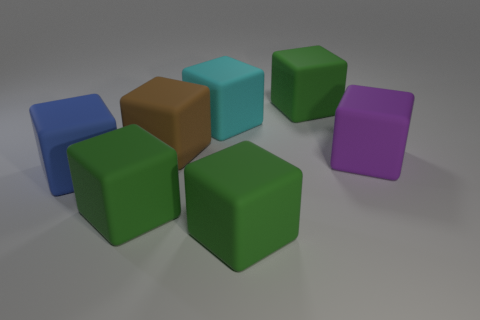

In [24]:

image = Image.open(os.path.join(image_dir, image_name + '.png')).convert('RGB')
image

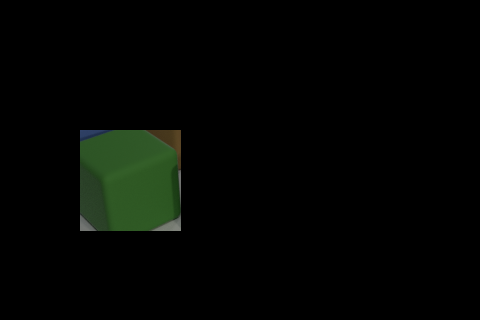

In [28]:
masked_image = image.copy()
pixels = masked_image.load()
x = 130
y = 180

mask_size = 50
for i, j in itertools.product(range(image.size[0]), range(image.size[1])): # for every pixel:
    if i < x-mask_size or i> x+mask_size or j < y-mask_size or j> y+mask_size:
        pixels[i, j] = (0,0,0)
masked_image


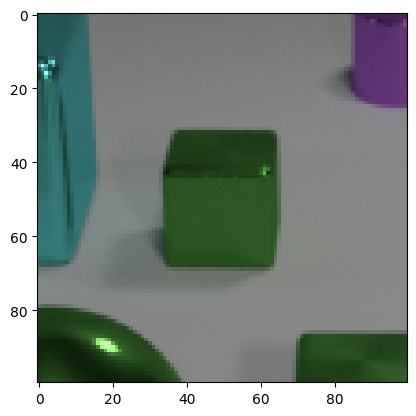

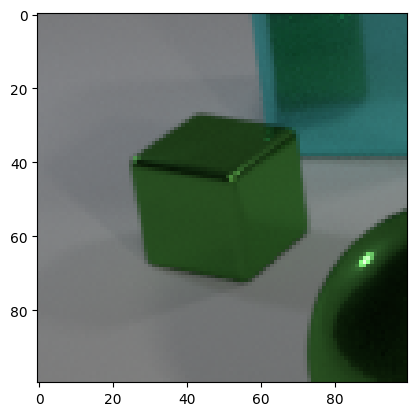

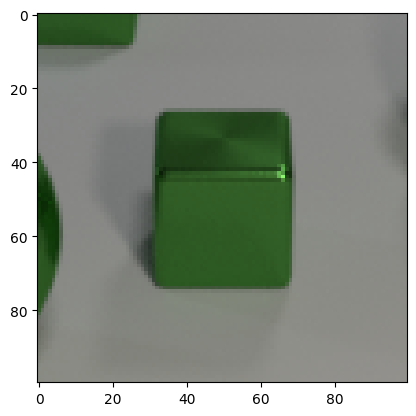

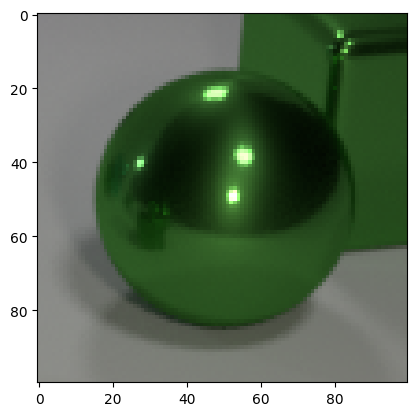

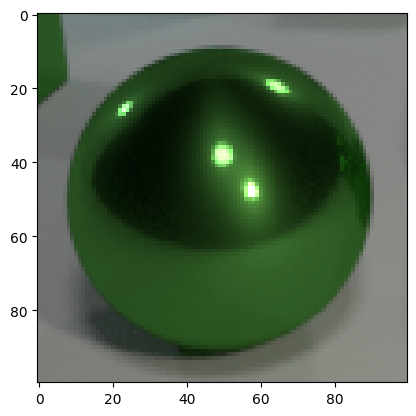

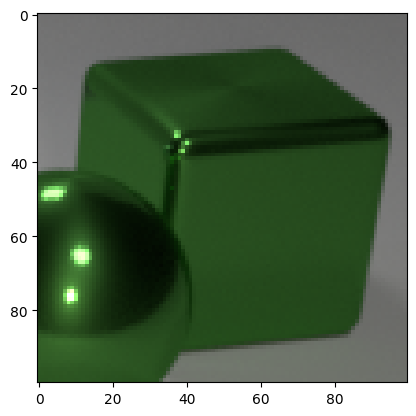

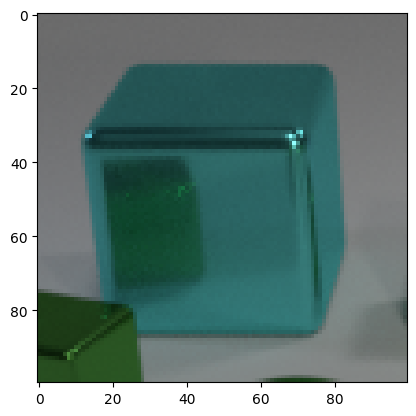

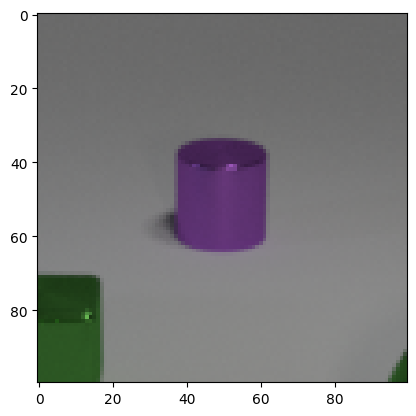

In [5]:
BOUNDING_BOX_SIZE = 100

object_bounding_boxes = []
for object in scene['objects']:
    x_center, y_center, depth = object['pixel_coords']
    object_bounding_boxes.append(image.crop(
        (x_center - BOUNDING_BOX_SIZE/2,
         y_center - BOUNDING_BOX_SIZE/2,
         x_center + BOUNDING_BOX_SIZE/2,
         y_center + BOUNDING_BOX_SIZE/2)
         ))

for image in object_bounding_boxes:
    pyplot.imshow(image)
    pyplot.show()

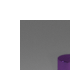

In [6]:
new = image.crop((-20,-20, 50,50))
new.size
new

In [16]:
from torchvision.models.resnet import resnet50, ResNet50_Weights
from torch import nn

resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

adapted_resnet = nn.Sequential(*list(resnet.children())[:-2])

resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
from torchvision.models import vgg16, VGG16_Weights
from torch import nn

vgg = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [13]:

classifier = nn.Sequential(list(vgg.children())[-1][:-3])
adapted = nn.Sequential(*list(vgg.children())[:-1], *classifier)
list(adapted.parameters())[-1].size()

torch.Size([4096])

In [2]:
class Test():
    def __init__(self) -> None:
        self._f = (3,5,6)
    
    @property
    def f(self):
        return self._f
    
test = Test()
test.f

TypeError: 'int' object is not callable

In [10]:
import os
from data_readers import ReferentialGameDataset
from PIL import Image
from matplotlib import pyplot

data_root = '/scratch/guskunkdo/clevr-images-unambigous-colour/'
image_path = os.path.join(data_root, 'images/') 
scenes_path = os.path.join(data_root, 'scenes/') 

In [11]:
dataset = ReferentialGameDataset(
        scenes_json_dir=scenes_path,
        image_path=image_path,
        max_number_samples=100,
    )

loading scenes...
creating combinations...
shuffling...
looping...


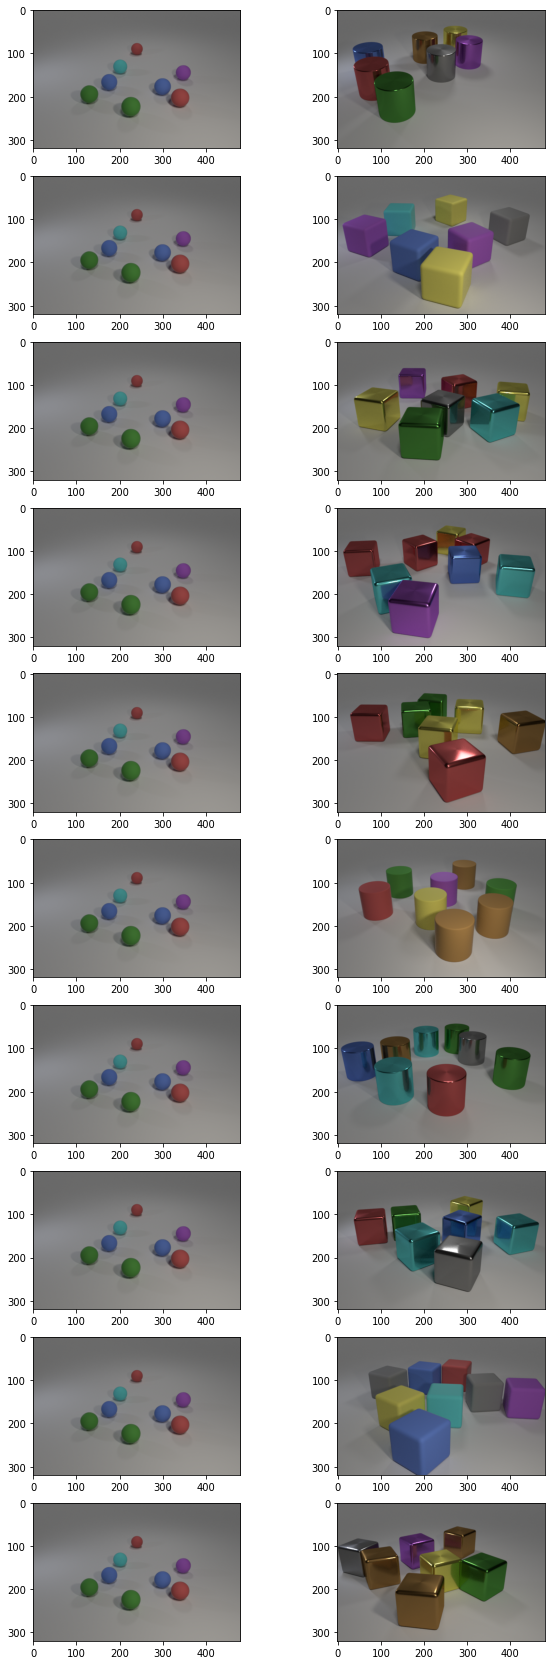

In [17]:
n_samples = 10
fig, ax = pyplot.subplots(nrows=n_samples, ncols=2)
fig.set_figwidth(10)
fig.set_figheight(3 * n_samples)
for index, sample in enumerate(dataset.samples[:n_samples]):
    image_1 = Image.open(image_path + sample.image_1_id)
    image_2 = Image.open(image_path + sample.image_2_id)
    ax[index, 0].imshow(image_1)
    ax[index, 1].imshow(image_2)
pyplot.show()

In [6]:
import torch
from matplotlib import pyplot

In [7]:
interaction = torch.load('/home/dominik/Downloads/dessi_etal_data.interaction')
type(interaction)

egg.core.interaction.Interaction

In [11]:
print(len(interaction.sender_input))
print(type(interaction.sender_input[5]))

5000
<class 'torch.Tensor'>


TypeError: 'NoneType' object is not subscriptable

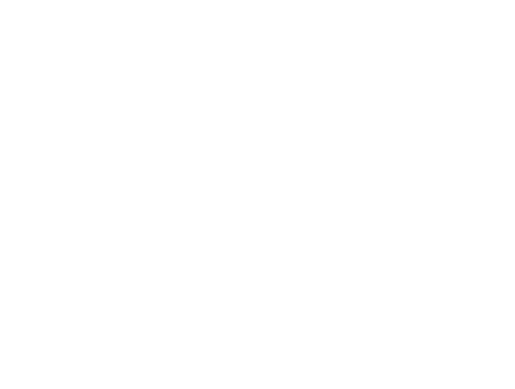

In [20]:
img_idx = 5 #@param {type:"integer"}

pyplot.axis('off')
pyplot.imshow(interaction.receiver_input[img_idx].permute(1, 2, 0) / interaction.sender_input[img_idx].max())